In [1]:
!pip install scipy

In [2]:
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quantstats as qs
import performanceanalytics.statistics as pas
import performanceanalytics.table.table as pat
from scipy import stats

Read the maximum sharpe portfolio and the maximum return portfolio with 2% target risk.

In [4]:
msp_mrp_weights = pd.read_csv('msp_mrp_weights.csv', index_col=0)
msp_mrp_weights

,MSP_Allocation,MRP_Allocation
IVV,1.252659e-01,6.680645e-03
IDEV,1.812207e-14,7.933746e-03
IUSB,5.642226e-01,6.880607e-01
IEMG,3.461187e-14,6.355869e-15
IAGG,3.105116e-01,2.456302e-01
IJH,2.188051e-14,1.698839e-02
IJR,1.881365e-14,3.470634e-02


The applymap() method from pandas will apply a function to every element of dataframe. We'll pass the format() method to applymap(). You have to specify the replacement in the curly braces({}). Write the specification of the format you want after :. We want to have a percentage, so we use '%'. It will multiply the number by 100 and displays a percentage followed by a percent sign. .2 specifies that you want to see two digits after the decimal point.

In [5]:
msp_mrp_weights.applymap("{:.2%}".format)

,MSP_Allocation,MRP_Allocation
IVV,12.53%,0.67%
IDEV,0.00%,0.79%
IUSB,56.42%,68.81%
IEMG,0.00%,0.00%
IAGG,31.05%,24.56%
IJH,0.00%,1.70%
IJR,0.00%,3.47%


Read return data of 7 tickers.

In [6]:
returns = pd.read_csv("hist_return.csv", index_col='Date', parse_dates=True).dropna()
returns

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR
Date,,,,,,,
2017-03-28,0.007360,0.000000,-0.001586,0.001661,-0.000677,0.007599,0.007973
2017-03-29,0.001478,0.005694,0.003773,0.002487,0.003484,0.003594,0.002637
2017-03-30,0.002530,0.000000,-0.001780,-0.005375,-0.000579,0.004873,0.008473
2017-03-31,-0.001935,-0.002343,0.001189,-0.006651,-0.000386,0.000351,0.001884
2017-04-03,-0.001686,-0.006184,0.002480,0.006487,0.002862,-0.005198,-0.018363
...,...,...,...,...,...,...,...
2019-12-24,0.000124,-0.003621,0.000769,-0.001684,0.001002,-0.000097,0.002741
2019-12-26,0.005176,0.007096,0.000768,0.007874,-0.000728,0.002188,-0.001307
2019-12-27,-0.000185,0.001203,0.001536,0.004278,0.000911,-0.001649,-0.004522


In order to calculate the daily return of each MSP and MRP portfolio, we're going to compute matrix multiplication between `returns` and `msp_mrp_weights`. To do matrix multiplication, we use `dot()` method from pandas.

In [7]:
msp_series = returns.dot(msp_mrp_weights.loc[:, "MSP_Allocation"]).rename("MSP")
msp_series

Date
2017-03-28   -0.000183
2017-03-29    0.003396
2017-03-30   -0.000867
2017-03-31    0.000308
2017-04-03    0.002077
                ...   
2019-12-24    0.000761
2019-12-26    0.000856
2019-12-27    0.001126
2019-12-30   -0.001246
2019-12-31   -0.000700
Name: MSP, Length: 696, dtype: float64

Do the same for the MRP portfolio.

In [8]:
mrp_series = returns.dot(msp_mrp_weights.loc[:, "MRP_Allocation"]).rename("MRP")
mrp_series

Date
2017-03-28   -0.000803
2017-03-29    0.003659
2017-03-30   -0.000973
2017-03-31    0.000763
2017-04-03    0.001623
                ...   
2019-12-24    0.000841
2019-12-26    0.000433
2019-12-27    0.001104
2019-12-30   -0.000517
2019-12-31   -0.000939
Name: MRP, Length: 696, dtype: float64

We join the above data with return dataframe.

In [9]:
etfs = returns.join(msp_series).join(mrp_series)
etfs

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR,MSP,MRP
Date,,,,,,,,,
2017-03-28,0.007360,0.000000,-0.001586,0.001661,-0.000677,0.007599,0.007973,-0.000183,-0.000803
2017-03-29,0.001478,0.005694,0.003773,0.002487,0.003484,0.003594,0.002637,0.003396,0.003659
2017-03-30,0.002530,0.000000,-0.001780,-0.005375,-0.000579,0.004873,0.008473,-0.000867,-0.000973
2017-03-31,-0.001935,-0.002343,0.001189,-0.006651,-0.000386,0.000351,0.001884,0.000308,0.000763
2017-04-03,-0.001686,-0.006184,0.002480,0.006487,0.002862,-0.005198,-0.018363,0.002077,0.001623
...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000124,-0.003621,0.000769,-0.001684,0.001002,-0.000097,0.002741,0.000761,0.000841
2019-12-26,0.005176,0.007096,0.000768,0.007874,-0.000728,0.002188,-0.001307,0.000856,0.000433
2019-12-27,-0.000185,0.001203,0.001536,0.004278,0.000911,-0.001649,-0.004522,0.001126,0.001104


Assume there are 252 trading days in a year. Risk-free rate is set to `0.0`.

In [10]:
ROOT_OF_252 = 252 ** 0.5
rf = 0.0

In [11]:
a_return = etfs.apply(lambda x: pas.annualized_return(x, x.index[0], x.index[-1]))
a_return

IVV     0.145433
IDEV    0.079467
IUSB    0.042303
IEMG    0.072623
IAGG    0.049549
IJH     0.091674
IJR     0.095563
MSP     0.058190
MRP     0.048518
dtype: float64

In [12]:
std = etfs.apply(lambda x: ROOT_OF_252 * x.std())
std

IVV     0.132034
IDEV    0.115719
IUSB    0.026142
IEMG    0.164119
IAGG    0.033415
IJH     0.139173
IJR     0.157138
MSP     0.024695
MRP     0.022721
dtype: float64

In [13]:
sharpe = etfs.apply(lambda x: ROOT_OF_252 * (x - rf).mean() / x.std())
sharpe

IVV     1.093991
IDEV    0.718316
IUSB    1.596859
IEMG    0.509028
IAGG    1.462932
IJH     0.699529
IJR     0.659109
MSP     2.301130
MRP     2.095171
dtype: float64

Making a table out of above data.

In [14]:
table = pd.DataFrame({'Annualized_return': a_return, 
                      'Annualized_std_dev': std, 
                      "Annualized_Sharpe (Rf = 0.0)": sharpe}).T
table

,IVV,IDEV,IUSB,IEMG,IAGG,IJH,IJR,MSP,MRP
Annualized_return,0.145433,0.079467,0.042303,0.072623,0.049549,0.091674,0.095563,0.058190,0.048518
Annualized_std_dev,0.132034,0.115719,0.026142,0.164119,0.033415,0.139173,0.157138,0.024695,0.022721
Annualized_Sharpe (Rf = 0.0),1.093991,0.718316,1.596859,0.509028,1.462932,0.699529,0.659109,2.301130,2.095171


`drawdown_table()` method from `performanceanalytics` will return the drawdown data as below.

In [15]:
msp_drawdown = pat.drawdown_table(etfs["MSP"], trivial_dd=-0.005)
msp_drawdown

,From,Trough,End,Depth,Length,To Trough,Recovery
0,2017-12-11,2018-02-08,2018-07-13,-0.022559,214,59,155
1,2018-08-28,2018-12-24,2019-01-17,-0.018740,142,118,24
2,2019-09-05,2019-09-13,2019-10-04,-0.011710,29,8,21
3,2017-06-27,2017-07-07,2017-08-01,-0.011253,35,10,25
4,2019-10-07,2019-11-11,2019-11-20,-0.007476,44,35,9
5,2019-07-05,2019-07-11,2019-07-23,-0.005668,18,6,12
6,2017-11-08,2017-11-10,2017-11-22,-0.005374,14,2,12
7,2019-05-01,2019-05-13,2019-05-24,-0.005299,23,12,11


In [16]:
mrp_drawdown = pat.drawdown_table(etfs["MRP"], trivial_dd=-0.005)
mrp_drawdown

,From,Trough,End,Depth,Length,To Trough,Recovery
0,2017-12-11,2018-02-14,2018-08-20,-0.023203,252,65,187
1,2018-08-23,2018-10-24,2019-01-17,-0.019960,147,62,85
2,2019-09-05,2019-09-13,2019-10-04,-0.012518,29,8,21
3,2017-06-27,2017-07-07,2017-08-03,-0.010588,37,10,27
4,2019-10-07,2019-11-11,2019-11-26,-0.010023,50,35,15
5,2019-07-05,2019-07-11,2019-07-24,-0.006939,19,6,13
6,2017-11-07,2017-11-10,2017-11-22,-0.005885,15,3,12
7,2017-05-03,2017-05-09,2017-05-16,-0.005113,13,6,7
8,2019-11-27,2019-12-02,2019-12-13,-0.005015,16,5,11


To draw a rolling 20-day performance chart, we need rolling 20-day return data. We can calculate this by grouping returns with `rolling()` method and apply a function to each group that consists of 20 returns. We're going to apply a function `roll_return()` on 20-day rolling windows to get each window's annualized return. We defined `roll_return()` to get the cumulative return over the rolling period and then annualize it.

'rolling()' requires the number of data per calculation - we used 20 days.

In [17]:
def roll_return(data):
    total_return = (1 + data).prod()
    annual_return = (total_return ** (365 / (data.index[-1] - data.index[0]).days)) - 1
    return annual_return

In [18]:
r_return = etfs[['MSP','MRP']].rolling(20).apply(roll_return)
r_return.dropna()

,MSP,MRP
Date,,
2017-04-25,0.121855,0.125849
2017-04-26,0.134471,0.153953
2017-04-27,0.108214,0.120244
2017-04-28,0.120771,0.130920
2017-05-01,0.103532,0.104444
...,...,...
2019-12-24,0.052752,0.027194
2019-12-26,0.037269,0.008644
2019-12-27,0.055599,0.031794


Plot the rolling 20-day performance data with `plot()`.

Text(0, 0.5, 'Annualized Return')

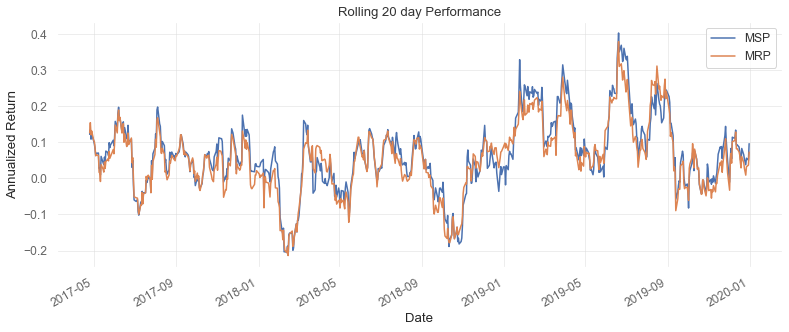

In [19]:
r_return.plot(figsize=(13,5))
plt.title("Rolling 20 day Performance")
plt.ylabel("Annualized Return")

Rolling 20-day standard deviation.

Text(0, 0.5, 'Annualized Standard Deviation')

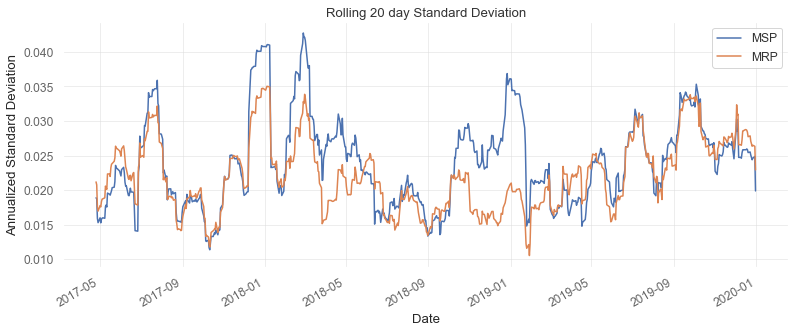

In [20]:
ROOT_OF_252 = 252 ** 0.5
std = etfs[['MSP','MRP']].rolling(20).apply(lambda x: x.std() * ROOT_OF_252)
std.plot(figsize=(13,5))
plt.title("Rolling 20 day Standard Deviation")
plt.ylabel("Annualized Standard Deviation")

Rolling 20-day sharpe ratio.

Text(0, 0.5, 'Annualized Sharpe Ratio')

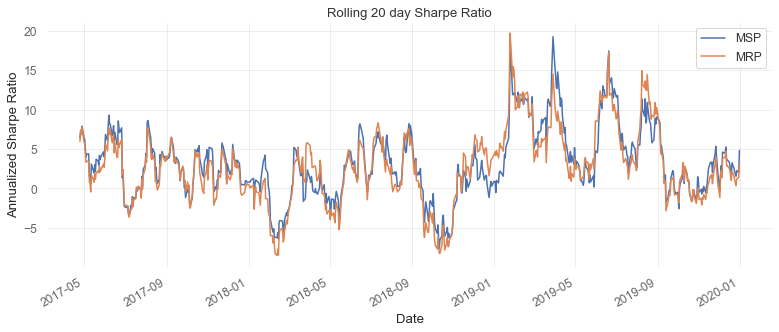

In [21]:
(r_return / std).plot(figsize=(13,5))
plt.title("Rolling 20 day Sharpe Ratio")
plt.ylabel("Annualized Sharpe Ratio")

Quantstats' 'monthly_returns' method gives returns of each month. 'plots' class will display nicely. 

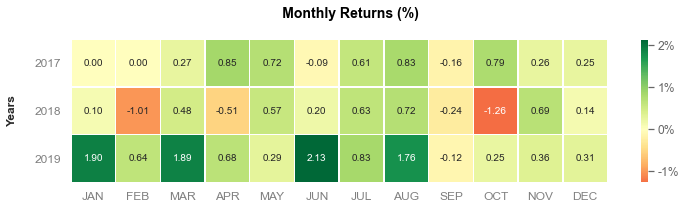

In [21]:
qs.plots.monthly_returns(etfs['MSP'], figsize=(10, 3))

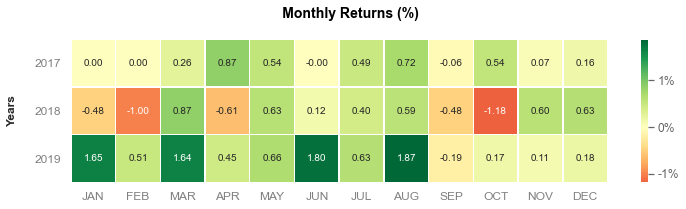

In [22]:
qs.plots.monthly_returns(etfs['MRP'], figsize=(10, 3))

#### Frequency

`distplot()` from seaborn will plot a histogram and density line to show the distribution of data.

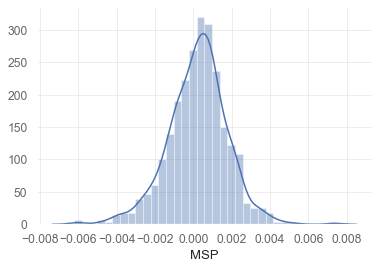

In [23]:
sns.distplot(etfs['MSP'])

`cumprod()` is used to get the cumulative product of the values over an axis. 

In [25]:
cumulative_return = (1 + etfs[['MSP','MRP']]).cumprod() - 1
cumulative_return

,MSP,MRP
Date,,
2017-03-28,-0.000183,-0.000803
2017-03-29,0.003212,0.002854
2017-03-30,0.002342,0.001877
2017-03-31,0.002651,0.002642
2017-04-03,0.004733,0.004269
...,...,...
2019-12-24,0.168892,0.139596
2019-12-26,0.169893,0.140089
2019-12-27,0.171210,0.141347


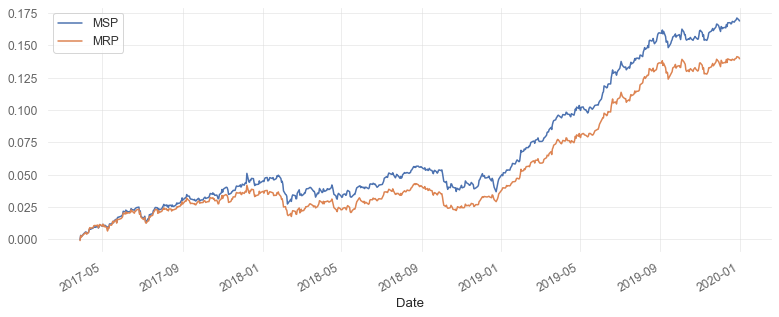

In [26]:
cumulative_return.plot(figsize=(13,5))

'create_downside_table' creates a table with downside measures. The inputs are data, column locations and risk-free rate.

In [27]:
pat.create_downside_table(etfs, [-1,-2] , rf = 0.01/365)

,MRP,MSP
Semi Deviation,0.000976,0.001089
Gain Deviation,0.000873,0.000972
Loss Deviation,0.000948,0.001059
Downside Deviation (MAR=2.0%),0.001430,0.001555
Downside Deviation (rf=0.0%),0.000950,0.001063
Downside Deviation (0%),0.000948,0.001059
Maximum Drawdown,0.010434,0.013506
Historical VaR (95%),0.002259,0.002393
Historical ES (95%),0.003153,0.003433
Modified VaR (95%),0.000925,0.000948
